# A-B_test_hypothesis_webpage
This is an A/B test hypothesis for an old webpage and a new one
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that we some practice working with the difficulties of these 

For this project,We will be working to understand the results of an A/B test run by an e-commerce website.Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
total_users = df.user_id.count()
total_users

294478

c. The number of unique users in the dataset.

In [5]:
total_unique_users = df.user_id.nunique()
total_unique_users

290584

d. The proportion of users converted.

In [6]:
conversion_rate=df["converted"].mean()

conversion_rate

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.query('group=="treatment" and landing_page !="new_page"').shape[0]

1965

In [8]:
df.query('group=="control" and landing_page !="old_page"').shape[0]

1928

f. Do any of the rows have missing values?

In [9]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  


In [10]:
removed = df.query('group=="treatment" and landing_page !="new_page"')
removed_2 = df.query('group=="control" and landing_page !="old_page"')

df.drop(index=removed_2.index,inplace=True)

df.drop(index=removed.index,inplace=True)

In [11]:
df2=df
df2.user_id.duplicated().sum()

1

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(['user_id'])].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2["user_id"] ==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0


What is the probability of an individual converting regardless of the page they receive?

In [17]:
total_cr = df2["converted"].mean()
total_cr

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control_group = df2.query('group=="control"')
control_cr = control_group['converted'].mean()
control_cr

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treatment_group = df2.query('group=="treatment"')
treatment_cr = treatment_group["converted"].mean()
treatment_cr

0.11880724790277405

d. What is the probability that an individual received the new page?

In [20]:
df2.query('group=="treatment"').user_id.count()/df2.user_id.count()

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**NO, this data tell us that new page get less conversion rate but we need to be sure that this diffrence not came by chance so we shouls perform A/B testing **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* #### Ho: Pnew - Pold <= 0 
   #### H1: Pnew - Pold > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


In [21]:
null_value = total_cr
null_value

0.11959667567149027

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = null_value
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = null_value
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2.query('group=="treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('group=="control"').user_id.nunique()
n_old 

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted= np.random.binomial(1,p_new,n_new) 

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1,p_old,n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
(new_page_converted).mean() - (old_page_converted).mean()

-0.00038760583186295272

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:

## as the results of converted values between [1 and 0] so we can stimulate sampleing using binomial distripution 
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [34]:
p_diffs = np.array(p_diffs)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

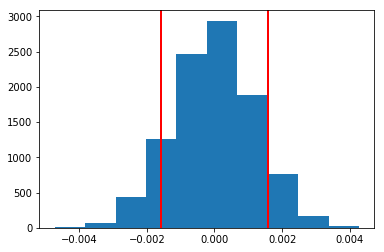

In [35]:
obs_diff = control_cr - treatment_cr  # observation diffrence between conversion rate in control and treatment groups
diff_mean = 0

low = obs_diff
high = diff_mean + (diff_mean - obs_diff)

plt.hist(p_diffs)
plt.axvline(low,color='r',linewidth=2)
plt.axvline(high,color='r',linewidth=2);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:

p_val = (p_diffs < obs_diff).mean() 
 
p_val

0.90610000000000002

 What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

 **p_value = 0.906 and at alpha = 0.05 is value mean that there is no significant difference between CR for old page and new page, in another word Fail to reject the null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page"')['converted'].sum()
convert_new = df2.query('landing_page=="new_page"')['converted'].sum()
n_old =df2.query('landing_page=="old_page"').user_id.nunique()
n_new = df2.query('landing_page=="new_page"').user_id.nunique()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

### Z-test for two proportions :
`1` we set the hypothesis as following : Ho : P_new = p_old

                                 H1 : p_new != p_old 
                                       
`2` number of converted and number of sample for new page and old page 


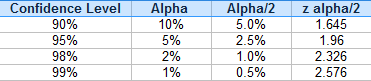

* The z-score associated with a 5% alpha level / 2 is 1.96.


In [42]:

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score, p_value)

1.31092419842 0.189883374482


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Z_score is 1.31 which is still lower than the targeted level of 1.96 so there is no significant difference between P_new and P_old .besides, p_value is 0.189 it is differ from the p_value in above ,but still no significant difference and we fail to reject the null. yes, it agree with the previous conclusions**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logitic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2[['control','ab_page']]=pd.get_dummies(df['group'])
df2.drop(['control'],axis=1,inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
df2['intercept'] = 1
lm = sm.Logit(df['converted'],df[['intercept','ab_page']])
result = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-24 13:42 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

In [63]:
1/np.exp(-0.0150)

1.0151130646157189

**This mean that new page is one time higher than old page in conversion rate**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**H0: pnew−pold=0**

**H1: pnew−pold≠0**

**P_value of ab_page = 0.1897 which is similar to previous result it also not significant difference.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**in real-world things are correlated and one thing is affected by many other things so, Yes it is always a good idea to explore other things that may affect our dependent variable to make sure that our conclusion does not miss anything that affects our decision.
We should be careful when we adding more explanatory variables to our model:
 we choose the variables that do not have any correlation to each other (multicollinearity) or drop one of them of this correlation found**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
countries = pd.read_csv('countries.csv')
countries.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [47]:
df_new=df2.merge(countries,how='inner',left_on='user_id',right_on='user_id')


In [48]:
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


In [49]:
lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
result = lm.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-24 13:42 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
==================================================================

"""

In [65]:
1/np.exp(-0.0150)

1.0151130646157189

In [67]:
1/np.exp(-0.0408)

1.0416437559600236

In [69]:
1/np.exp(0.0099)

0.99014884368295708

**still no significant difference between old and new page between different 3 countries.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df_new['CA_page'] = df_new['CA']*df_new['ab_page']

df_new['US_page'] = df_new['US']*df_new['ab_page']

In [53]:

lm = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','US', 'CA_page', 'US_page']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-24 13:49 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA_page      -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
US_page      -0.0314    0.0266    -1.1811  0.2375  -0.0835   0.0207
==================================================================

"""

In [54]:
np.exp(0.0108)   ##ab_bage

1.010858530520097

In [59]:
1/np.exp(-0.0118) ## CA

1.011869894648401

In [56]:
np.exp(0.0057)  ## US

1.0057162759095335

In [60]:
1/np.exp(-0.0783) ## CA_page

1.0814470441230692

In [61]:
1/np.exp(-0.0314) ## UA_page

1.0318981806179213

**The results of regression model confirm that there is no statistical difference in convertion rate between old and new page and the interperetation of model result confirm that**:

**for new page in UK conversion rate is 1 time more than CA and US holding all other constant** 

#### these numbers not practically enought to change to new page ,but i suggest to extend the duration of running test to exclude any novelty effect or change aversion , also i suggest extend our analysis to more than 3 countries. but till i recommend not change to new page.